# A player has a 20% chance of playing a valid move in Othello. If they attempt to play 10 moves, what is the probability that 2 are valid?
# We assume the player has a 20% chance of playing a valid move (playing a random move in a non-occupied square at the starting position).
# We also assume that each attempt to play a move is independent.
# The random variable I am examining is the probability of playing a valid move in Othello.
# One trial would look like calculating the odds for each move, then recording if 2 of those were valid.
# A success would be playing 2 valid moves, while a failure would be playing 0-1 or 3-10 valid moves.
# ~30.20%

In [2]:
!pip install gymnasium
!pip install 'gymnasium[atari]'
!pip install 'gymnasium[other]'
!pip install ale-py
!pip install autorom[accept-rom-license]

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [1]:
import ale_py
import gymnasium as gym

# Register the ALE environments
gym.register_envs(ale_py)

# Now check the registry
gym.pprint_registry()

===== classic_control =====
Acrobot-v1                  CartPole-v0                 CartPole-v1
MountainCar-v0              MountainCarContinuous-v0    Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0          phys2d/CartPole-v1          phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3            BipedalWalkerHardcore-v3    CarRacing-v3
LunarLander-v3              LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1                CliffWalking-v1             CliffWalkingSlippery-v1
FrozenLake-v1               FrozenLake8x8-v1            Taxi-v3
===== tabular =====
tabular/Blackjack-v0        tabular/CliffWalking-v0
===== None =====
Ant-v2                      Ant-v3                      GymV21Environment-v0
GymV26Environment-v0        HalfCheetah-v2              HalfCheetah-v3
Hopper-v2                   Hopper-v3                   Humanoid-v2
Humanoid-v3                 HumanoidStandup-v2          InvertedDoublePendulum-v2
InvertedPendulum-v2         Pusher-v2             

KeyboardInterrupt: 

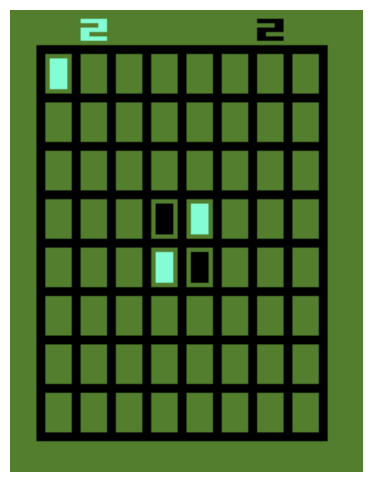

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython import display

env = gym.make("ALE/Othello-v5", render_mode="rgb_array")

# Reset the environment
obs, info = env.reset()

# Initial frame for comparison and display
prev_frame = env.render()

plt.figure(figsize=(6, 6))
img = plt.imshow(prev_frame)
plt.axis("off")

done = False
total_reward = 0
move = 0

while not done:
    # Choose a random action (for demonstration)
    move += 1
    if move == 1:
        action = 1
    else:
        action = random.randint(2, 9)
    
    # Step environment
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    total_reward += reward

    # Render new frame
    new_frame = env.render()
    
    # Check if the frame changed (indicating a valid move)
    if not np.array_equal(new_frame, prev_frame):
        prev_frame = new_frame
        img.set_data(new_frame)
        display.display(plt.gcf())
        display.clear_output(wait=True)

env.close()
print("Episode finished. Total reward:", total_reward)